In [1]:
#The only thing to include in the paper/presentation from this code is the bar graph

import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
#import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from time import time
import timeit

import random
random.seed(1000)

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\LMS-Khatrib\AppData\Local\Temp\ipykernel_12996\3159236473.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Side to side comparison plots

In [3]:
statallfeatures_dic = {
    'Run Time': [],
    'Accuracy': [],   ## To store the MEAN accuracy for 5-fold CV for each model
    'Standard Error': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1_Score': []   
}

In [4]:
## To store the accuracy for 5-fold CV for each model
indaccs_dic = {}

2017 train -> 2021 test

In [5]:
test1_df = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna()
train1_df = pd.read_csv('SRER_2017_training_bi.csv', na_values='?').dropna()
test_df = test1_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])
train_df= train1_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])
bigtest1_df = pd.read_csv('SRER21_pred.csv', na_values='?')
bg1 = bigtest1_df.drop(columns=["Veg_class"])
#OID__x,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_max,ARVI_med,EVI_mean,EVI_max,EVI_med,NDVI_mean,NDVI_max,NDVI_med,SAVI_mean,SAVI_max,SAVI_med,Veg_class
bigtest_df = bg1.dropna()
bigtest_df = bigtest_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"]).fillna(0)

In [6]:
#Logistic Regression

kf = KFold(n_splits=5, random_state=3, shuffle=True)
model = LogisticRegression(solver='liblinear')

start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

testindex8 = []
testindex9 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex8.append(test_index)
    testindex9.append(pred_values)

elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LogReg']=acc_score

---Run time is 0.046398700000000126 seconds ---

Accuracy of each fold: 
 [0.6900921658986175, 0.6820276497695853, 0.6866359447004609, 0.6762672811059908, 0.6689734717416378]
Avg accuracy: 0.6807993026432584
Std of accuracy : 
0.007514280143532669

[[1507  581]
 [ 804 1447]]

              precision    recall  f1-score   support

   non-woody       0.65      0.72      0.69      2088
       woody       0.71      0.64      0.68      2251

    accuracy                           0.68      4339
   macro avg       0.68      0.68      0.68      4339
weighted avg       0.68      0.68      0.68      4339

0.7217432950191571
0.6428254109284762
0.6520986585893552
0.6851557172084566


In [7]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 547 1683]
 [  97 4478]]

              precision    recall  f1-score   support

   non-woody       0.85      0.25      0.38      2230
       woody       0.73      0.98      0.83      4575

    accuracy                           0.74      6805
   macro avg       0.79      0.61      0.61      6805
weighted avg       0.77      0.74      0.69      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7384276267450404
sens  0.9787978142076502
spec  0.2452914798206278
prec  0.8493788819875776
f1_score  0.38065414057063324


In [8]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [9]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog = woodyarea / totalarea * 100

17210155.439991977
2725102.5800019708
19935258.01999423


In [10]:
#LDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=LinearDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex1 = []
testindex2 = []
  
for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex1.append(test_index)
    testindex2.append(pred_values)

elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LDA']=acc_score

---Run time is 41.978206 seconds ---

Accuracy of each fold: 
 [0.6693548387096774, 0.684331797235023, 0.6785714285714286, 0.6578341013824884, 0.6793540945790081]
Avg accuracy: 0.6738892520955251
Std of accuracy : 
0.009371902667903812

[[1439  649]
 [ 766 1485]]

              precision    recall  f1-score   support

   non-woody       0.65      0.69      0.67      2088
       woody       0.70      0.66      0.68      2251

    accuracy                           0.67      4339
   macro avg       0.67      0.67      0.67      4339
weighted avg       0.68      0.67      0.67      4339

0.689176245210728
0.6597067969791204
0.6526077097505669
0.6703936641043559


In [11]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 732 1498]
 [ 148 4427]]

              precision    recall  f1-score   support

   non-woody       0.83      0.33      0.47      2230
       woody       0.75      0.97      0.84      4575

    accuracy                           0.76      6805
   macro avg       0.79      0.65      0.66      6805
weighted avg       0.77      0.76      0.72      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7581190301249081
sens  0.9676502732240437
spec  0.32825112107623317
prec  0.8318181818181818
f1_score  0.4707395498392283


In [12]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [13]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda = woodyarea / totalarea * 100

13172009.799991863
6763248.220002641
19935258.01999423


In [14]:
#QDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=QuadraticDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex3 = []
testindex4 = []


for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)


    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex3.append(test_index)
    testindex4.append(pred_values)

elapsed = timeit.default_timer() - start_time


print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['QDA']=acc_score

---Run time is 83.62731310000001 seconds ---

Accuracy of each fold: 
 [0.6048387096774194, 0.6036866359447005, 0.6140552995391705, 0.5829493087557603, 0.5709342560553633]
Avg accuracy: 0.5952928419944828
Std of accuracy : 
0.01587017770274781

[[1901  187]
 [1569  682]]

              precision    recall  f1-score   support

   non-woody       0.55      0.91      0.68      2088
       woody       0.78      0.30      0.44      2251

    accuracy                           0.60      4339
   macro avg       0.67      0.61      0.56      4339
weighted avg       0.67      0.60      0.56      4339

0.9104406130268199
0.3029764549089294
0.5478386167146974
0.6840590140338251


In [15]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[1037 1193]
 [ 430 4145]]

              precision    recall  f1-score   support

   non-woody       0.71      0.47      0.56      2230
       woody       0.78      0.91      0.84      4575

    accuracy                           0.76      6805
   macro avg       0.74      0.69      0.70      6805
weighted avg       0.75      0.76      0.75      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7614988978692138
sens  0.9060109289617486
spec  0.46502242152466366
prec  0.7068847989093388
f1_score  0.5609954016770354


In [16]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [17]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda = woodyarea / totalarea * 100

18419048.13998929
1516209.880004336
19935258.01999423


#KNN-CV
KNN_result = []
X=subject_df.iloc[:, 2:17]
Y=subject_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,26):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

In [18]:
KNN_result = []
X=train_df.iloc[:, 5:18]
Y=train_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

K=1

Accuracy of each fold: 
 [0.63018433 0.62327189 0.62442396 0.61866359 0.59976932]

Avg accuracy: 0.6192626196588693

K=2

Accuracy of each fold: 
 [0.64170507 0.61866359 0.62672811 0.60599078 0.61937716]

Avg accuracy: 0.6224929440466889

K=3

Accuracy of each fold: 
 [0.6578341  0.62442396 0.62903226 0.63709677 0.62745098]

Avg accuracy: 0.63516761543327

K=4

Accuracy of each fold: 
 [0.6624424  0.63479263 0.65092166 0.61866359 0.62745098]

Avg accuracy: 0.6388542513779705

K=5

Accuracy of each fold: 
 [0.65898618 0.62557604 0.64861751 0.6359447  0.64821223]

Avg accuracy: 0.6434673300060061

K=6

Accuracy of each fold: 
 [0.66820276 0.64170507 0.66013825 0.62327189 0.65513264]

Avg accuracy: 0.6496901227284082

K=7

Accuracy of each fold: 
 [0.67857143 0.64516129 0.64631336 0.64170507 0.65743945]

Avg accuracy: 0.6538381196881029

K=8

Accuracy of each fold: 
 [0.66935484 0.65207373 0.6624424  0.63364055 0.66320646]

Avg accuracy: 0.6561435959583075

K=9

Accuracy of each fold

In [19]:
#KNN-CV
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=neighbors.KNeighborsClassifier(n_neighbors=10)

acc_score = []
Truth = []
Output = []

testindex5 = []
testindex6 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex5.append(test_index)
    testindex6.append(pred_values)

elapsed = timeit.default_timer() - start_time

print()
print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['KNN']=acc_score


---Run time is 127.693636 seconds ---

Accuracy of each fold: 
 [0.6751152073732719, 0.6682027649769585, 0.6728110599078341, 0.6405529953917051, 0.6735870818915801]
Avg accuracy: 0.6660538219082699
Std of accuracy : 
0.012957075960606603

[[1520  568]
 [ 881 1370]]

              precision    recall  f1-score   support

   non-woody       0.63      0.73      0.68      2088
       woody       0.71      0.61      0.65      2251

    accuracy                           0.67      4339
   macro avg       0.67      0.67      0.67      4339
weighted avg       0.67      0.67      0.67      4339

0.7279693486590039
0.6086183918258552
0.6330695543523532
0.6772109601247495


In [20]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 964 1266]
 [ 364 4211]]

              precision    recall  f1-score   support

   non-woody       0.73      0.43      0.54      2230
       woody       0.77      0.92      0.84      4575

    accuracy                           0.76      6805
   macro avg       0.75      0.68      0.69      6805
weighted avg       0.75      0.76      0.74      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7604702424687729
sens  0.9204371584699453
spec  0.43228699551569505
prec  0.7259036144578314
f1_score  0.5418774592467679


In [21]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [22]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn = woodyarea / totalarea * 100

10463097.379991591
9472160.640002644
19935258.01999423


In [23]:
transitionsdf = pd.DataFrame(
    data = np.transpose(np.array([
                                statallfeatures_dic["Accuracy"],
                                statallfeatures_dic["Standard Error"],
                                statallfeatures_dic["Sensitivity"],
                                statallfeatures_dic["Specificity"],
                                statallfeatures_dic["Precision"],
                                statallfeatures_dic["F1_Score"],
                                statallfeatures_dic["Run Time"] 
                            ])
                       ),
    
    columns = ["Accuracy", "Standard Error", "Sensitivity", "Specificity", "Precision", "F1-Score", "Run Time"]
    
)

transitionsdf.set_index(pd.Index(["LogReg", "LDA", "QDA", "KNN-CV"]))

,Accuracy,Standard Error,Sensitivity,Specificity,Precision,F1-Score,Run Time
LogReg,0.680799,0.007514,0.721743,0.642825,0.652099,0.685156,0.046399
LDA,0.673889,0.009372,0.689176,0.659707,0.652608,0.670394,41.978206
QDA,0.595293,0.015870,0.910441,0.302976,0.547839,0.684059,83.627313
KNN-CV,0.666054,0.012957,0.727969,0.608618,0.633070,0.677211,127.693636


['LogReg', 'LDA', 'QDA', 'KNN-CV']
Accuracies[0.6807993026432584, 0.6738892520955251, 0.5952928419944828, 0.6660538219082699]
Sen[0.7217432950191571, 0.689176245210728, 0.9104406130268199, 0.7279693486590039]
Spec[0.6428254109284762, 0.6597067969791204, 0.3029764549089294, 0.6086183918258552]
P[0.6520986585893552, 0.6526077097505669, 0.5478386167146974, 0.6330695543523532]
F1[0.6851557172084566, 0.6703936641043559, 0.6840590140338251, 0.6772109601247495]


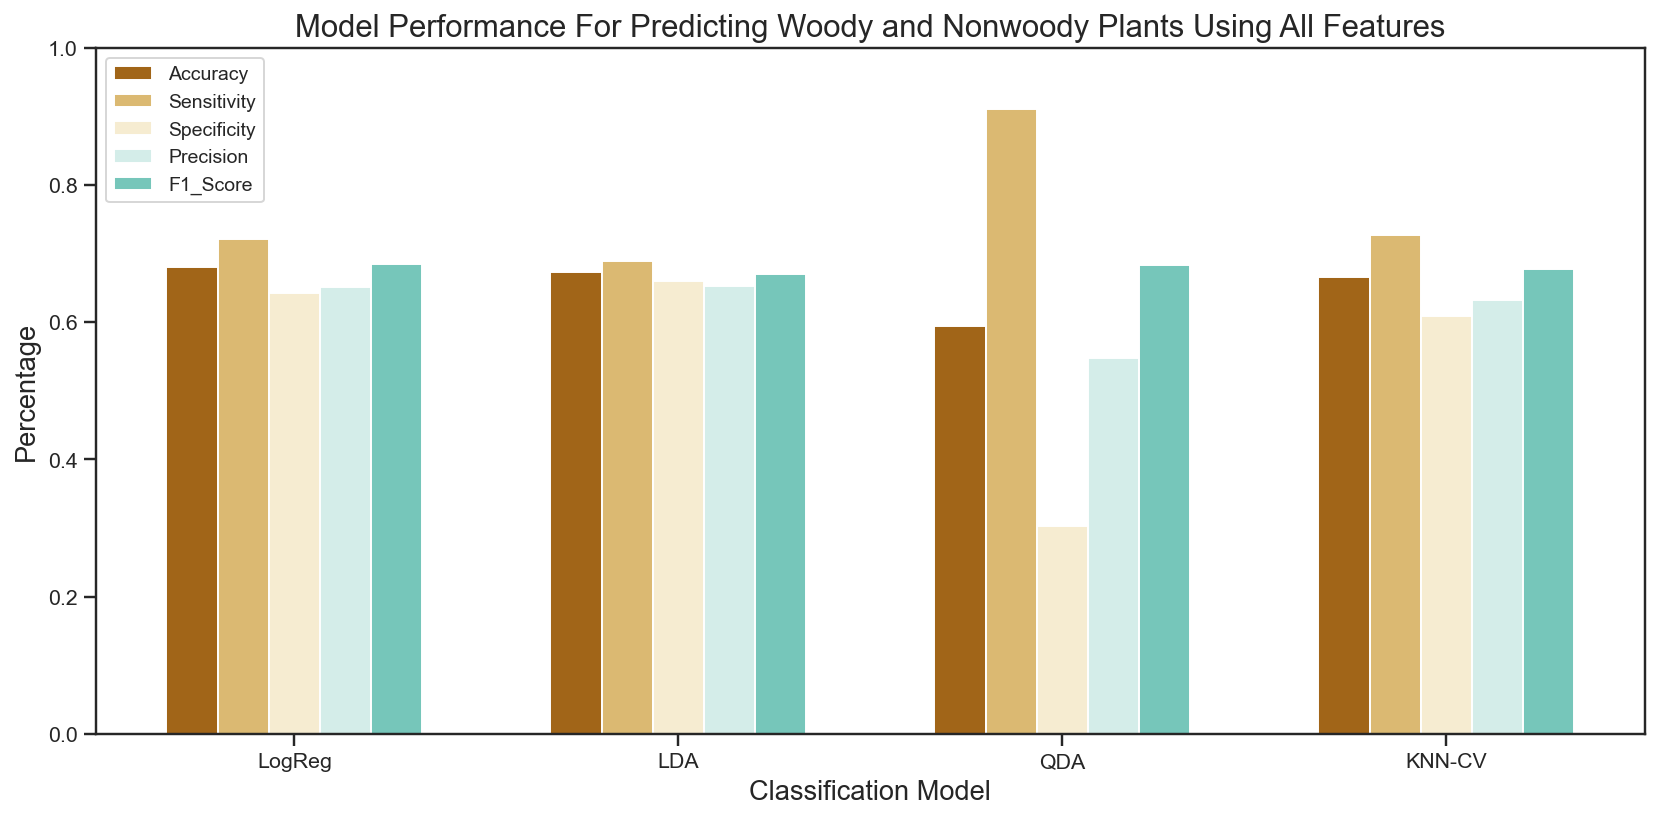

In [24]:
#Bar Graph
models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']
print(models)
accuracies = statallfeatures_dic["Accuracy"]
print("Accuracies" + str(accuracies))
sensitivities = statallfeatures_dic["Sensitivity"]
print("Sen" + str(sensitivities))
specificities = statallfeatures_dic["Specificity"]
print("Spec" + str(specificities))
precisions = statallfeatures_dic["Precision"]
print("P" + str(precisions))
f1_scores = statallfeatures_dic["F1_Score"]
print("F1" + str(f1_scores))

x = 6*np.arange(len(models))
width = 0.8

fig, ax = plt.subplots(figsize=(12, 6))
import seaborn as sns
colors = sns.color_palette("BrBG")

acc = ax.bar(x-width*2, accuracies, width, label='Accuracy', color=colors[0])
sen = ax.bar(x-width, sensitivities, width, label='Sensitivity', color=colors[1])
spe = ax.bar(x,specificities, width, label='Specificity', color=colors[2])
pre = ax.bar(x+width, precisions, width, label='Precision', color=colors[3])
f1 = ax.bar(x+width*2 , f1_scores, width, label='F1_Score', color=colors[4])

ax.set_xlabel('Classification Model', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Model Performance For Predicting Woody and Nonwoody Plants Using All Features', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set(ylim=(0.0, 1))


fig.tight_layout()

plt.legend(loc="upper left", prop={'size': 10})
plt.show()

fig.savefig('AllFeaturesPerformance.png')

#Code from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

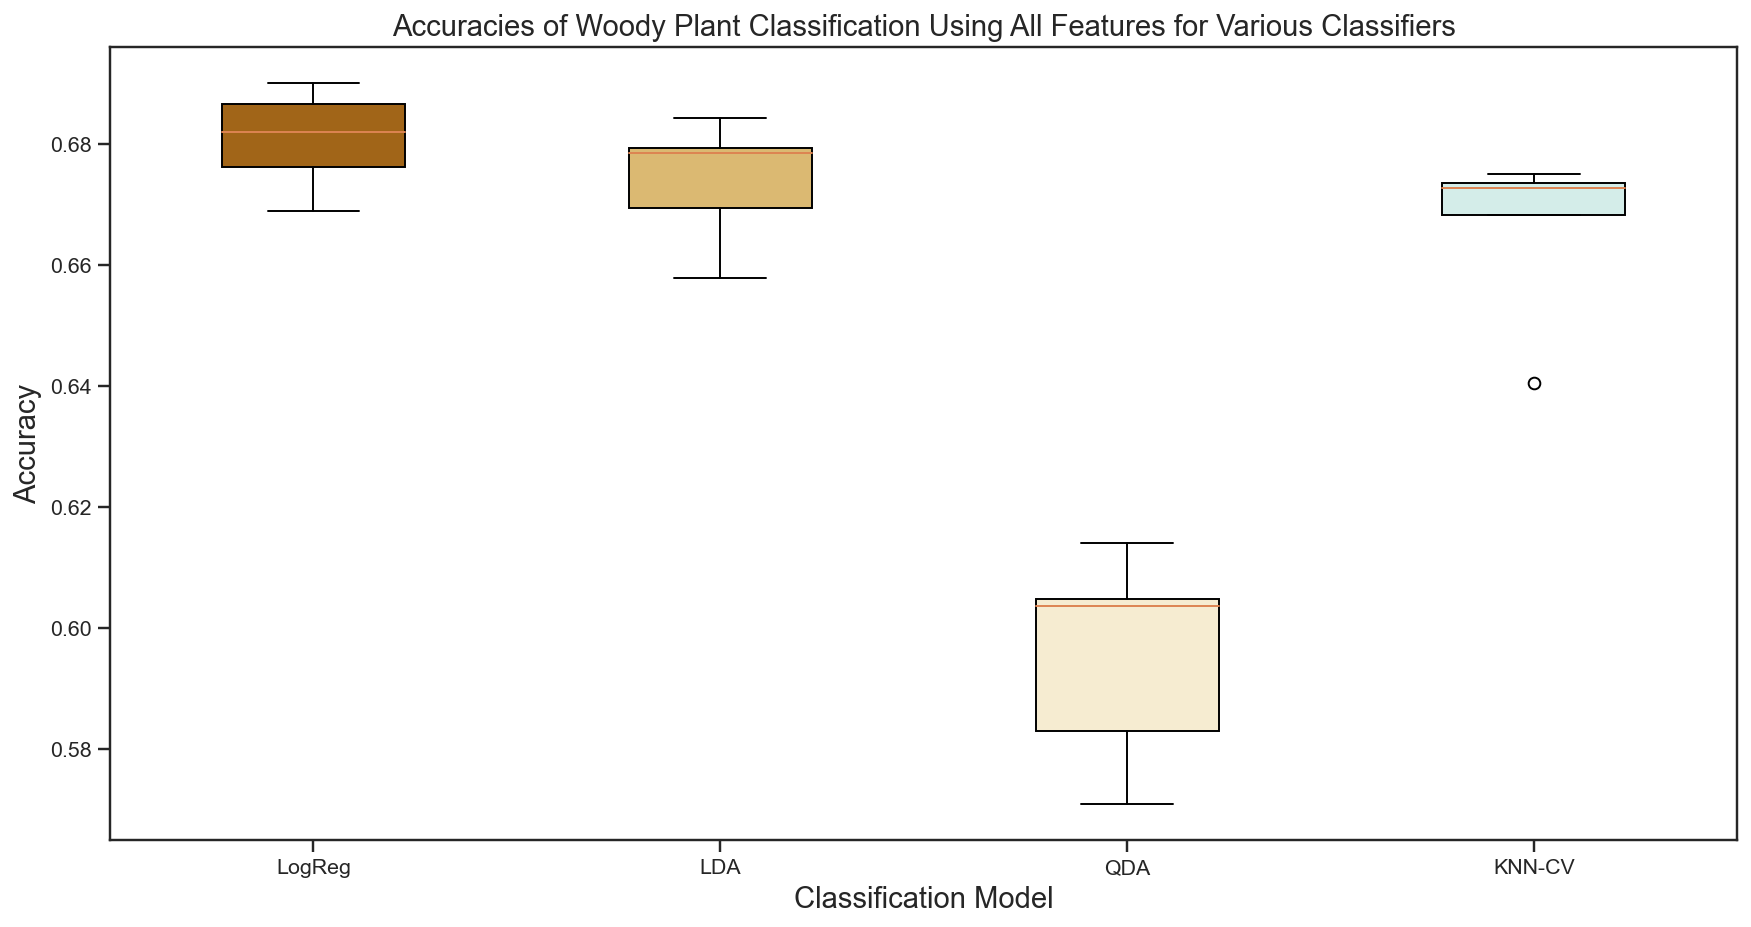

In [25]:
#Box Plot Accuracies

models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']

x = np.arange(len(models))+1

LogRegAcc = indaccs_dic['LogReg']
LDAAcc = indaccs_dic['LDA']
QDAAcc = indaccs_dic['QDA']
KNNAcc = indaccs_dic['KNN']

data = [LogRegAcc, LDAAcc, QDAAcc, KNNAcc]

fig, ax = plt.subplots(figsize = (15,7.5))
bplot = ax.boxplot(data, patch_artist = True)

ax.set_title('Accuracies of Woody Plant Classification Using All Features for Various Classifiers', fontsize=15)
ax.set_xlabel('Classification Model', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(models)

import seaborn as sns
#colors = sns.color_palette("colorblind")
colors = sns.color_palette()
colors = sns.color_palette("BrBG")

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.show()

In [26]:

print("Log reg pred: " + str(FWClog))

print("QDA pred: " + str(FWCqda))

print("LDA pred: " + str(FWClda))

print("KNN pred: " +str(FWCknn))

Log reg pred: 86.33023672295043
QDA pred: 92.39433029417405
LDA pred: 66.07393687496238
KNN pred: 52.48538729469938
